## Data Visualizations

In [1]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import matplotlib.pyplot as plt

### Data augmentation

In [2]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255, # rescale all pixel values from 0-255, so aftre this step all our pixel values are in range (0,1) 
        zoom_range=0.2,
        rotation_range =15,#rotating image by 15deg
        horizontal_flip=True) #to apply zoom) # image will be flipper horiz
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

## Load the dataset

In [3]:
training_set = train_datagen.flow_from_directory(
        './car_data/train',
        target_size=(224, 224),
        color_mode="rgb",
        batch_size=10,
        class_mode='categorical',
        shuffle = True,
        seed=42)
val_set = val_datagen.flow_from_directory(
        './car_data/val',
        target_size=(224,224),
        color_mode="rgb",
        batch_size=10,
        class_mode='categorical',
        shuffle = False,
        seed=42 )
test_set = val_datagen.flow_from_directory(
        './car_data/test',
        target_size=(224, 224),
        color_mode="rgb",
        batch_size=10,
        class_mode='categorical',
        shuffle = False,
        seed=42 )

Found 165 images belonging to 5 classes.
Found 30 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


### visualizing the images from the folder

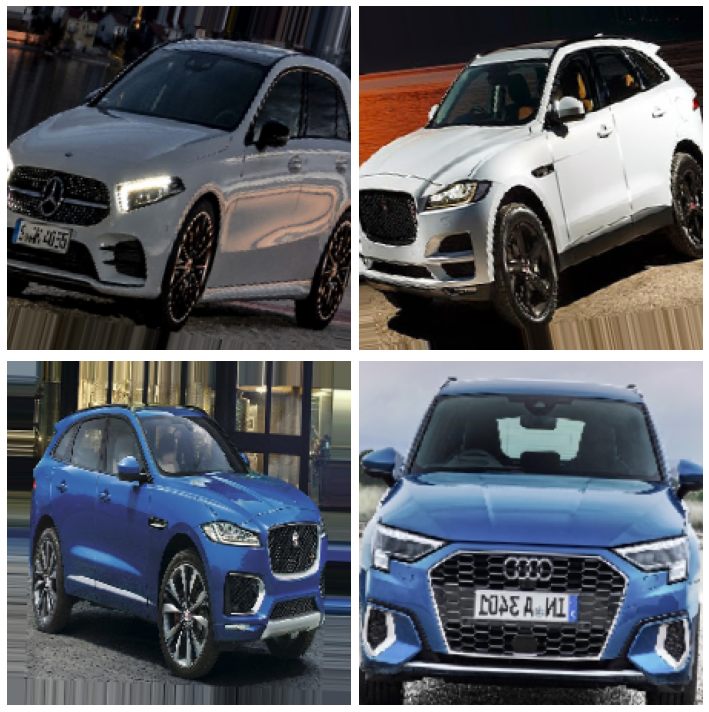

In [4]:
sample_training_images, _ = next(training_set)
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(2, 2, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(sample_training_images[:4])

### visualizing images from each folder for each class

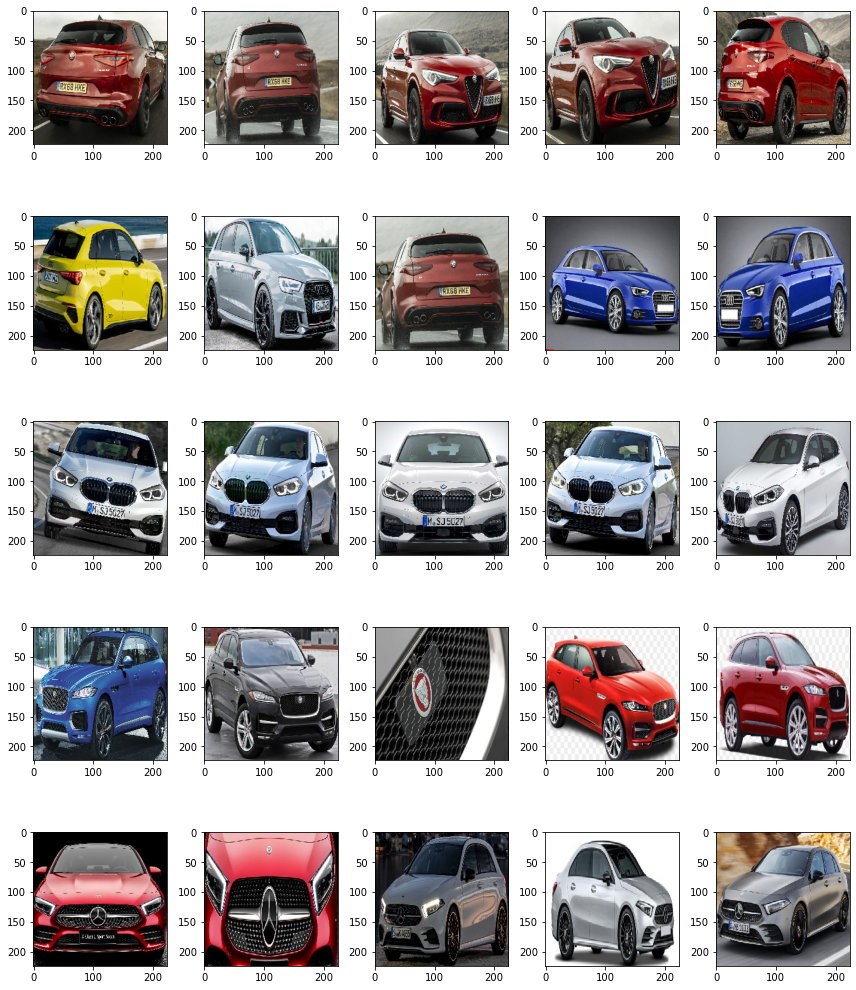

In [5]:
import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os

# size of the image: 48*48 pixels
pic_size = 224

# input path for the images
base_path = "car_data/"

plt.figure(0, figsize=(12,20))
cpt = 0

for signal in os.listdir(base_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "train/" + signal + "/" +os.listdir(base_path + "train/" + signal)[i], target_size=(pic_size, pic_size))
        #img = img.rotate(270)
        plt.imshow(img)
plt.tight_layout()
plt.show()

## Visualizing how each data augmentation works

### Load one image from one class and visualise the data augmentations on this image

In [6]:
img = load_img('car_data/train/audi/audi (1).jpg')

In [7]:
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)

#### Rotation range

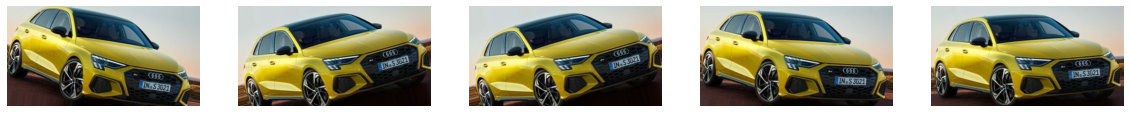

In [8]:
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range = 15)
# prepare iterator
data = datagen.flow(samples, batch_size=10)
plt.figure(figsize=(20,100))
# generate samples and plot
for i in range(5):
    # define subplot
    pyplot.subplot(5,5,i+1)
    # generate batch of images
    batch = data.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')

    # plot raw pixel data
    pyplot.imshow(image)
    pyplot.axis('off')
# show the figure
pyplot.show()

#### Zoom_range

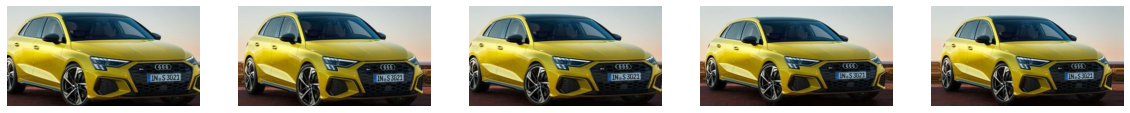

In [9]:
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range = 0.1)
# prepare iterator
data = datagen.flow(samples, batch_size=10)
plt.figure(figsize=(20,100))
# generate samples and plot
for i in range(5):
    # define subplot
    pyplot.subplot(5,5,i+1)
    # generate batch of images
    batch = data.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')

    # plot raw pixel data
    pyplot.imshow(image)
    pyplot.axis('off')
# show the figure
pyplot.show()

#### Horizontal_flip

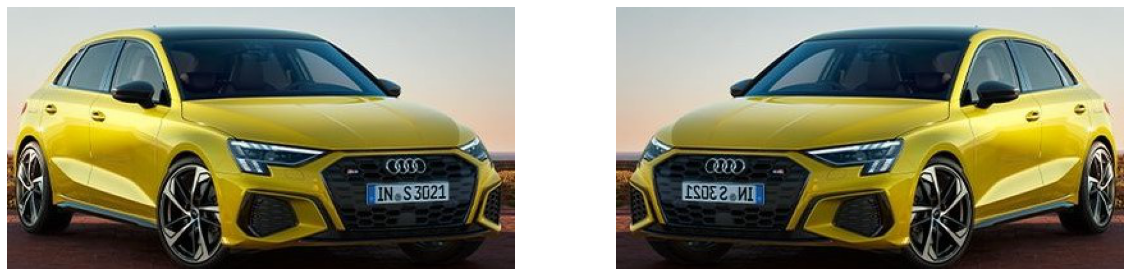

In [10]:
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip = True)
# prepare iterator
data = datagen.flow(samples, batch_size=10)
plt.figure(figsize=(20,100))
# generate samples and plot
for i in range(2):
    # define subplot
    pyplot.subplot(2,2,i+1)
    # generate batch of images
    batch = data.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')

    # plot raw pixel data
    pyplot.imshow(image)
    pyplot.axis('off')
# show the figure
pyplot.show()

### This file comprises of various data visualizations related to the car_image classification. The model is built in the next file.